<a href="https://colab.research.google.com/github/wanghongree/temp_drafts/blob/main/calibrate_CIFAR10_pre_check_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [71]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
import os
import shutil
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [28]:
if os.path.exists('logs'):
    shutil.rmtree('logs')
os.mkdir('logs')

if os.path.exists('saved_model'):
    shutil.rmtree('saved_model')
os.mkdir('saved_model')

In [29]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

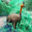

In [30]:
img = x_train[6] *255
cv2_imshow(img)

In [31]:
# Make sure images have shape (32, 32, 1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [32]:
batch_end_loss = list()

class SaveBatchLoss(tf.keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        batch_end_loss.append(logs['loss'])


In [33]:
my_callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath='./saved_model/model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True), 
                #SaveBatchLoss()
                ]

In [34]:
batch_size = 256
steps_per_epoch = 400
learning_rate = 1
epochs = 70


In [35]:
model_name = 'model222'

In [36]:
kr=None
br=None

In [37]:
def create_model():
  inputs = keras.Input(shape=input_shape)
  short_cut1 = layers.Conv2D(32, kernel_size=(3, 3), padding = 'same', kernel_regularizer = kr, bias_regularizer = br)(inputs)
  short_cut1 = layers.BatchNormalization()(short_cut1)
  x = layers.Conv2D(32, kernel_size=(3, 3), padding = 'same', kernel_regularizer = kr, bias_regularizer = br)(inputs)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)
  x = layers.Conv2D(32, kernel_size=(3, 3), padding = 'same', kernel_regularizer = kr, bias_regularizer = br)(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)
  x = layers.Conv2D(32, kernel_size=(3, 3), padding = 'same', kernel_regularizer = kr, bias_regularizer = br)(x)
  x = layers.BatchNormalization()(x)
  x = layers.Add()([short_cut1, x])
  x = layers.ReLU()(x)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)
  short_cut2 = layers.Conv2D(64, kernel_size=(3, 3), padding = 'same', kernel_regularizer = kr, bias_regularizer = br)(x)
  short_cut2 = layers.BatchNormalization()(short_cut2)
  x = layers.Conv2D(64, kernel_size=(3, 3), padding = 'same', kernel_regularizer = kr, bias_regularizer = br)(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)
  x = layers.Conv2D(64, kernel_size=(3, 3), padding = 'same', kernel_regularizer = kr, bias_regularizer = br)(x)
  x = layers.BatchNormalization()(x)  
  x = layers.ReLU()(x)
  x = layers.Conv2D(64, kernel_size=(3, 3), padding = 'same', kernel_regularizer = kr, bias_regularizer = br)(x)
  x = layers.BatchNormalization()(x)
  x = layers.Add()([short_cut2, x])
  x = layers.ReLU()(x)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Flatten()(x)
  # x = layers.Dropout(0.5)(x)
  x = layers.Dense(num_classes, activation="softmax", kernel_regularizer = kr, bias_regularizer = br)(x)
  model =  tf.keras.Model(inputs, x, name=model_name)
  return model

In [38]:
# model.count_params()

In [39]:
# x_tra, x_val, y_tra, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [40]:
import pickle

In [41]:
opt = SGD(learning_rate = learning_rate)
model = create_model()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, validation_data=(x_test, y_test), steps_per_epoch = steps_per_epoch, epochs=epochs, verbose=1, callbacks=my_callbacks, shuffle = True)
with open(f'history-lr-{learning_rate}.pkl', 'wb') as config_dictionary_file:
  pickle.dump(history, config_dictionary_file)


Epoch 1/70
400/400 [==============================] - 26s 42ms/step - loss: 1.3921 - accuracy: 0.4880 - val_loss: 1.6342 - val_accuracy: 0.4518
Epoch 2/70
400/400 [==============================] - 16s 41ms/step - loss: 0.8714 - accuracy: 0.6869 - val_loss: 1.0173 - val_accuracy: 0.6506
Epoch 3/70
400/400 [==============================] - 17s 41ms/step - loss: 0.6700 - accuracy: 0.7632 - val_loss: 0.8195 - val_accuracy: 0.7202
Epoch 4/70
400/400 [==============================] - 16s 41ms/step - loss: 0.5492 - accuracy: 0.8075 - val_loss: 0.8146 - val_accuracy: 0.7192
Epoch 5/70
400/400 [==============================] - 16s 41ms/step - loss: 0.4709 - accuracy: 0.8354 - val_loss: 0.9924 - val_accuracy: 0.6619
Epoch 6/70
400/400 [==============================] - 17s 41ms/step - loss: 0.4064 - accuracy: 0.8574 - val_loss: 1.0115 - val_accuracy: 0.7154
Epoch 7/70
400/400 [==============================] - 17s 42ms/step - loss: 0.3638 - accuracy: 0.8727 - val_loss: 0.9651 - val_accuracy:

400/400 [==============================] - 5s 13ms/step - loss: 8.8387e-04 - accuracy: 1.0000 - val_loss: 0.9557 - val_accuracy: 0.8419


In [49]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [48]:
# history_result[f'history-lr-{learning_rate}'].history['loss']

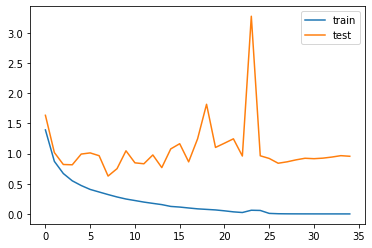

In [46]:

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
# plt.title('lrate='+str(learning_rate), pad=-50)
plt.legend()
# show learning curves
plt.show()

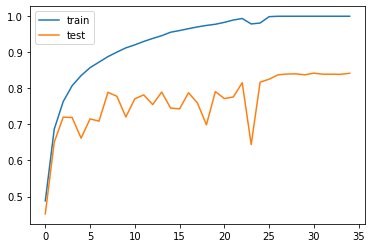

In [47]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
# plt.title('lrate='+str(learning_rate), pad=-50)
plt.legend()
# show learning curves
plt.show()

In [60]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [50]:
yhat = model.predict(x_test)
results = model.evaluate(x_test, y_test, batch_size=128)

79/79 [==============================] - 1s 8ms/step - loss: 0.9557 - accuracy: 0.8419


In [67]:
yhat = model.predict(x_test)
y_predicted = np.argmax(yhat, axis = 1)
y_true = np.argmax(y_test, axis=1)
test_result = pd.DataFrame({'predicted': y_predicted, 'true':y_true})
test_result['correct'] = (test_result['predicted'] == test_result['true'])
summary = test_result.groupby(['true'])['correct'].agg(correct = 'sum', total = 'count')
summary['correction_rate'] = summary['correct'] / summary['total'] * 100


In [100]:
summary

,correct,total,correction_rate
true,,,
0,879,1000,87.9
1,917,1000,91.7
2,735,1000,73.5
3,713,1000,71.3
4,829,1000,82.9
5,768,1000,76.8
6,886,1000,88.6
7,863,1000,86.3
8,911,1000,91.1


In [97]:
from sklearn.metrics import confusion_matrix

In [99]:
confusion_matrix(test_result['true'], test_result['predicted'])

array([[879,   8,  20,  11,   9,   4,   4,  10,  38,  17],
       [ 13, 917,   3,   3,   1,   2,   3,   2,  14,  42],
       [ 49,   1, 735,  44,  53,  41,  48,  16,   9,   4],
       [ 24,   5,  33, 713,  45, 103,  41,  21,   8,   7],
       [  9,   1,  45,  28, 829,  21,  27,  32,   5,   3],
       [  5,   3,  23, 126,  30, 768,  10,  31,   0,   4],
       [  4,   2,  24,  38,  27,  13, 886,   2,   2,   2],
       [ 17,   0,  13,  30,  31,  35,   5, 863,   1,   5],
       [ 39,  14,   6,   4,   1,   1,   6,   4, 911,  14],
       [ 16,  39,   2,   4,   0,   3,   2,   4,  12, 918]])